# Library import

In [82]:
# Load in our libraries
from __future__ import print_function
from __future__ import division
import os 

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# machine learning
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json
from statsmodels.tsa.stattools import adfuller

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline


# Acquire data
The Python Pandas packages helps us work with the datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. 

In [17]:
# load the provided data
train_features = pd.read_csv('./data/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('./data/dengue_labels_train.csv',
                           index_col=[0,1,2])

# Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

In [18]:
print(train_features.columns.values)

['week_start_date' 'ndvi_ne' 'ndvi_nw' 'ndvi_se' 'ndvi_sw'
 'precipitation_amt_mm' 'reanalysis_air_temp_k' 'reanalysis_avg_temp_k'
 'reanalysis_dew_point_temp_k' 'reanalysis_max_air_temp_k'
 'reanalysis_min_air_temp_k' 'reanalysis_precip_amt_kg_per_m2'
 'reanalysis_relative_humidity_percent' 'reanalysis_sat_precip_amt_mm'
 'reanalysis_specific_humidity_g_per_kg' 'reanalysis_tdtr_k'
 'station_avg_temp_c' 'station_diur_temp_rng_c' 'station_max_temp_c'
 'station_min_temp_c' 'station_precip_mm']


In [19]:
# Library import
train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [20]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, ('sj', 1990, 18) to ('iq', 2010, 25)
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        1456 non-null   object 
 1   ndvi_ne                                1262 non-null   float64
 2   ndvi_nw                                1404 non-null   float64
 3   ndvi_se                                1434 non-null   float64
 4   ndvi_sw                                1434 non-null   float64
 5   precipitation_amt_mm                   1443 non-null   float64
 6   reanalysis_air_temp_k                  1446 non-null   float64
 7   reanalysis_avg_temp_k                  1446 non-null   float64
 8   reanalysis_dew_point_temp_k            1446 non-null   float64
 9   reanalysis_max_air_temp_k              1446 non-null   float64
 10  reanalysis_min_air_temp_k              1446 n

In [21]:
train_features.shape

(1456, 21)

In [22]:
train_features.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


we can see there are gaps where there are NaNs by counting non-NaN entries. we fill those values with the most recent value that we saw up to that point.

This dataset has two cities in it: San Juan, Puerto Rico (right) and Iquitos, Peru (left). They both may follow different patterns so it is better to do further analysis separately 

In [23]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']


In [24]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

# Feature Exploration, Engineering and Cleaning

calculating correleration of different features(including label). This will help us to understand which features affect total_cases (Linearly)

In [25]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

In [26]:
# compute the correlations
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

Text(0.5, 1.0, 'San Juan Variable Correlations')

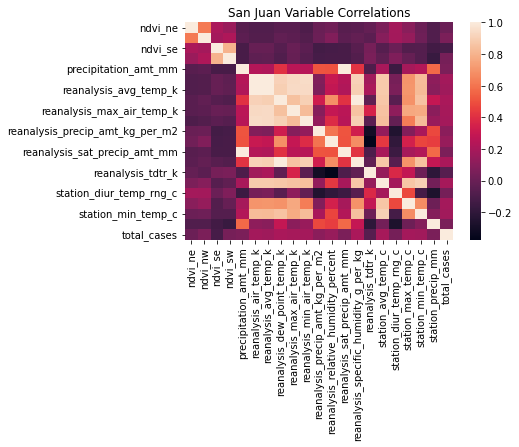

In [27]:
# plot san juan
sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

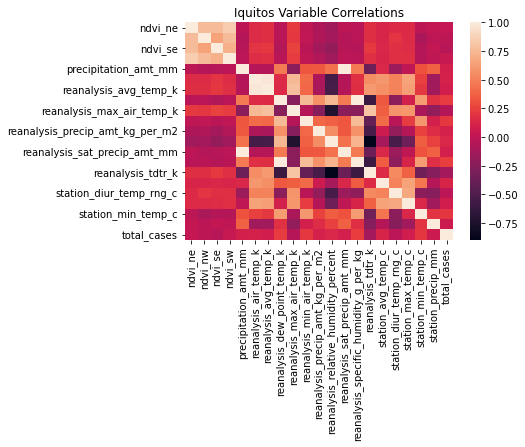

In [28]:
# plot iquitos
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

<AxesSubplot:>

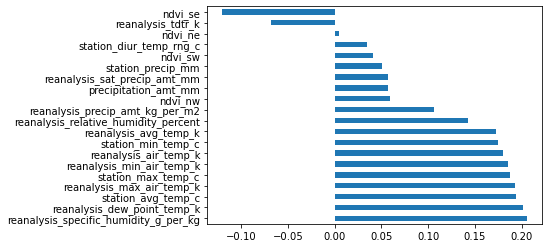

In [29]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())


<AxesSubplot:>

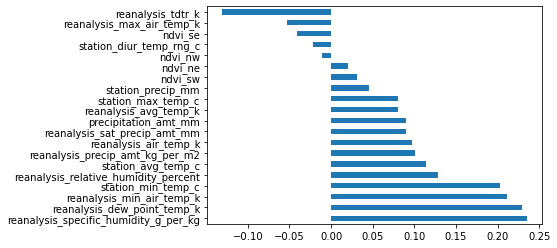

In [30]:
# Iquitos
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

By observing the above plots we can conclude that "total_cases" weakly depends on the given features. The only features that have good correlation with "total_cases" are 

    1. reanalysis_specific_humidity_g_per_kg
    2. reanalysis_dew_point_temp_k
    3. station_avg_temp_c
    4. station_min_temp_c

Thus in order to improve and reduce the complexity of a machine learning solution we can only consider the above mentioned features

<AxesSubplot:xlabel='year,weekofyear'>

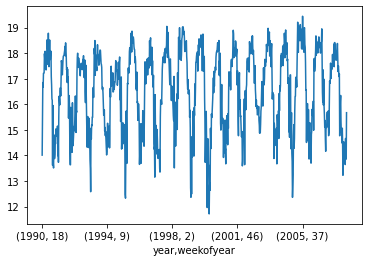

In [32]:
sj_train_features.reanalysis_specific_humidity_g_per_kg.plot(label='reanalysis_specific_humidity_g_per_kg')

we can visualy see that mean and std are almost constant across time thus making it stationary. Getting to know whether a time series is stationary or non-stationary is important because majority of machine learning algorithms assume that the input data is stationary i.e, statistical properties don't change with time mainly mean and std

## Augmented Dickey-Fuller Test

This test is used to assess whether or not a time-series is stationary. Without getting into too much details about hypothesis testing, you should know that this test will give a result called a “test-statistic”, based on which you can say, with different levels (or percentage) of confidence, if the time-series is stationary or not.

In [33]:


def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in sj_train_features.iteritems():
    if name!='week_start_date':
        adfuller_test(column, name=column.name)

 ndvi_ne : P-Value = 0.002 => Stationary. 
 ndvi_nw : P-Value = 0.025 => Stationary. 
 ndvi_se : P-Value = 0.0 => Stationary. 
 ndvi_sw : P-Value = 0.0 => Stationary. 
 precipitation_amt_mm : P-Value = 0.0 => Stationary. 
 reanalysis_air_temp_k : P-Value = 0.0 => Stationary. 
 reanalysis_avg_temp_k : P-Value = 0.0 => Stationary. 
 reanalysis_dew_point_temp_k : P-Value = 0.0 => Stationary. 
 reanalysis_max_air_temp_k : P-Value = 0.0 => Stationary. 
 reanalysis_min_air_temp_k : P-Value = 0.0 => Stationary. 
 reanalysis_precip_amt_kg_per_m2 : P-Value = 0.0 => Stationary. 
 reanalysis_relative_humidity_percent : P-Value = 0.0 => Stationary. 
 reanalysis_sat_precip_amt_mm : P-Value = 0.0 => Stationary. 
 reanalysis_specific_humidity_g_per_kg : P-Value = 0.0 => Stationary. 
 reanalysis_tdtr_k : P-Value = 0.0 => Stationary. 
 station_avg_temp_c : P-Value = 0.0 => Stationary. 
 station_diur_temp_rng_c : P-Value = 0.0 => Stationary. 
 station_max_temp_c : P-Value = 0.0 => Stationary. 
 station_

Thus we can conclude that the every column is stationary 

## Autocorrelation plots (ACF)

An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself.
Ideally, we want no correlation between the series and lags of itself.
https://www.investopedia.com/terms/a/autocorrelation.asp

ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm
total_cases


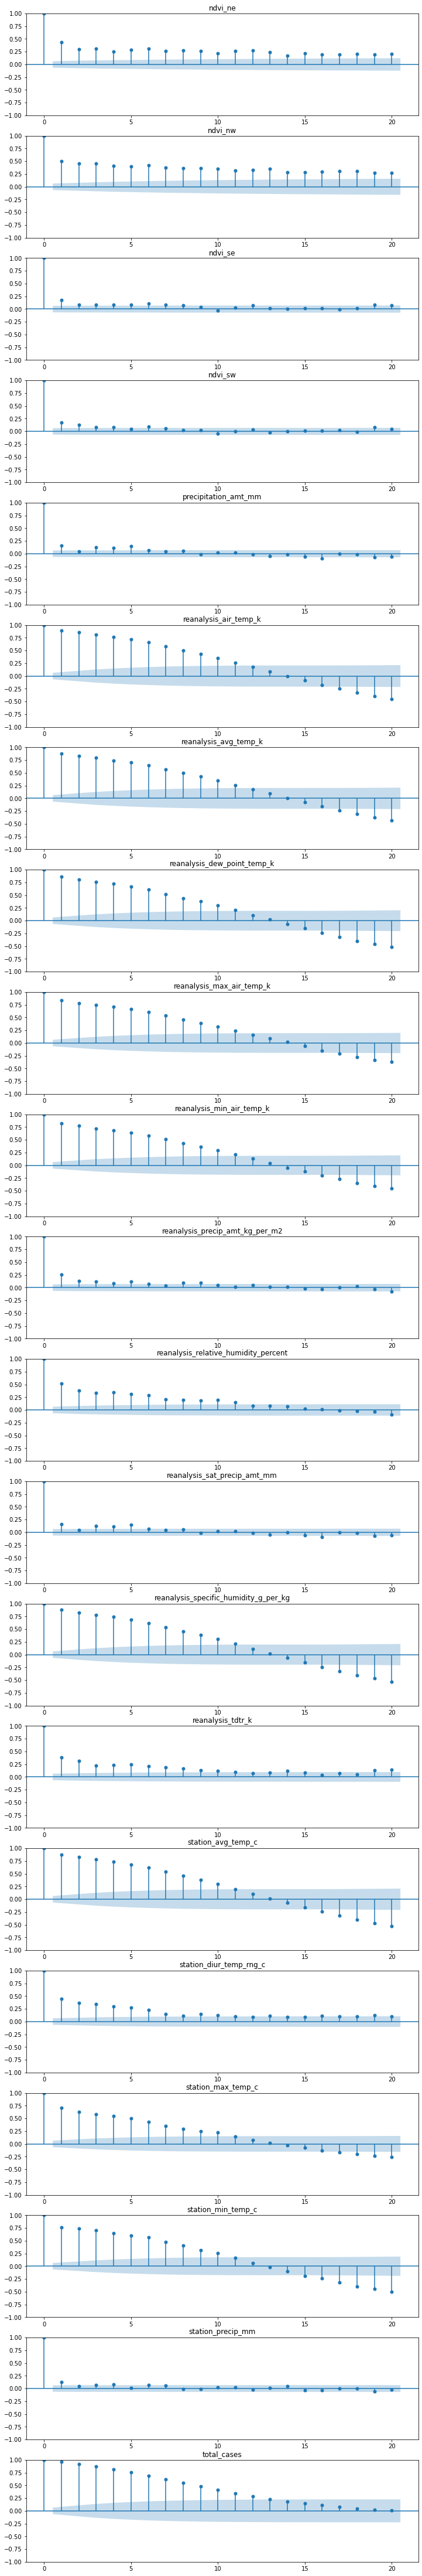

In [34]:


i=0
fig, ax = plt.subplots(sj_train_features.shape[1]-1, figsize=(12,80))
for name, column in sj_train_features.iteritems():
    if name!='week_start_date':
        ax[i] = plot_acf(column.dropna(), ax=ax[i], lags=20, title=name)
        i+=1
        print(name)

We can notice that apart from "station_precip_mm", "reanalysis_sat_precip_amt_mm", "reanalysis_precip_amt_kg_per_m2", "ndvi_se", "ndvi_sw", and "precipitation_amt_mm" all the columns have some correlation with its previous value

### Ploting the label

<AxesSubplot:xlabel='year,weekofyear'>

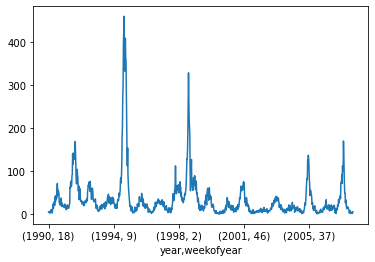

In [35]:
sj_train_features.total_cases.plot()

we can observe from the above plot that label has follow some trend and seasonality.

### Decomposing series to do further analysis

In [36]:


# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [37]:
sj_train_features['Date'] = pd.to_datetime(sj_train_features['week_start_date'])
# Set the date as index 
sj_train_features = sj_train_features.set_index('Date')

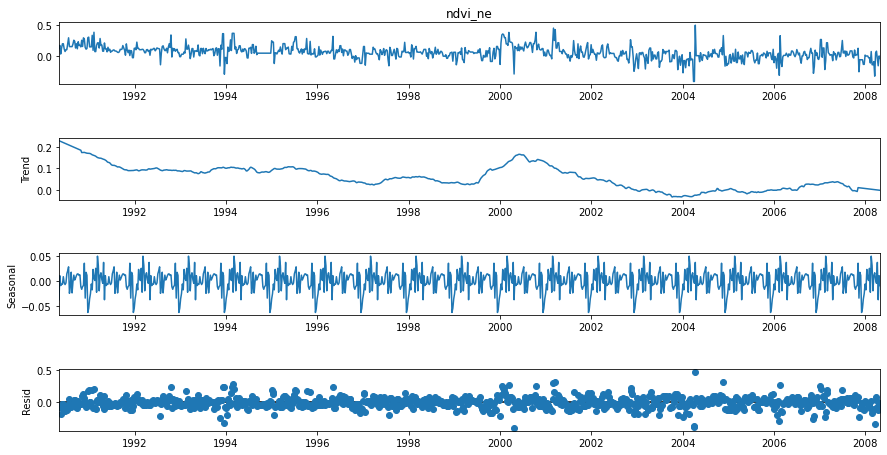

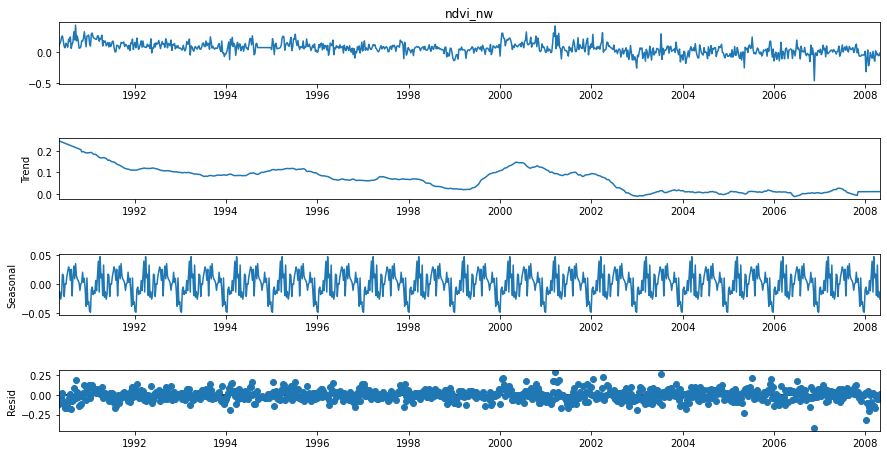

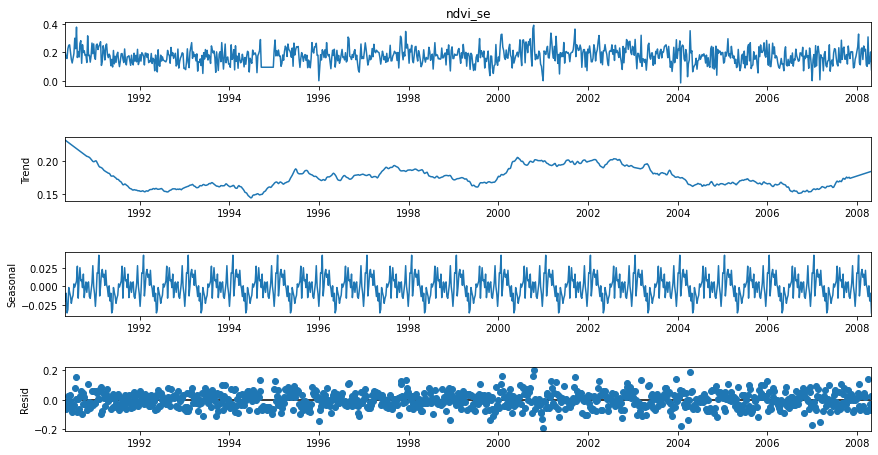

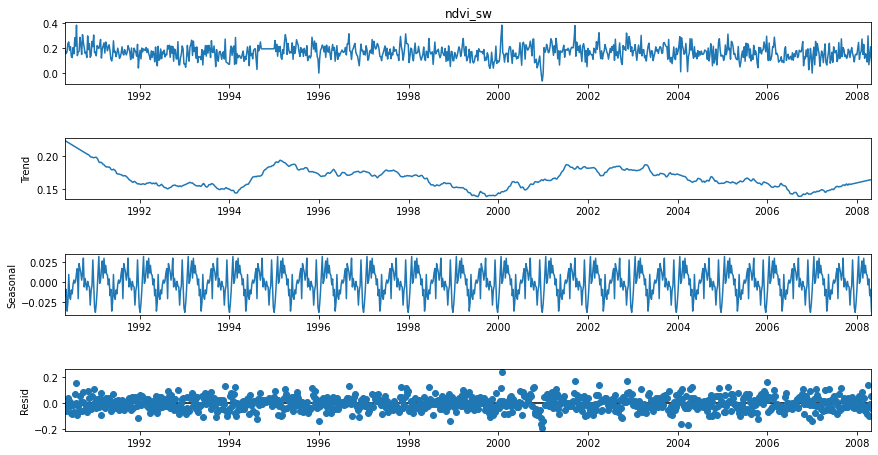

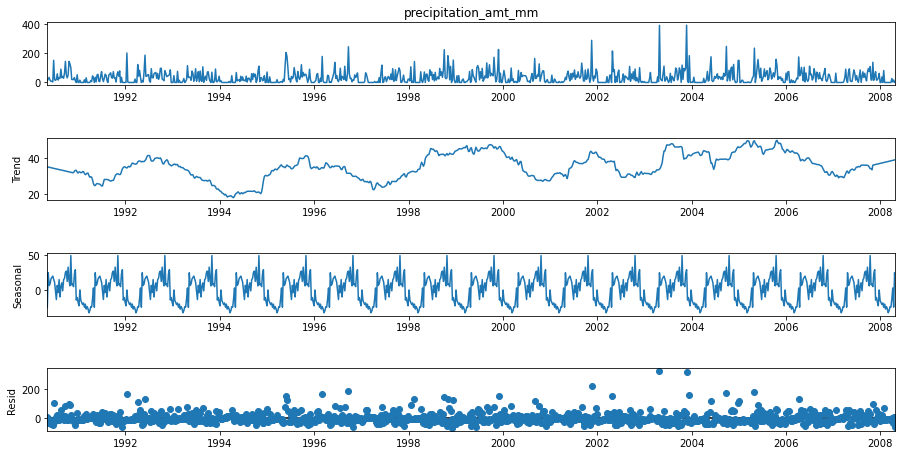

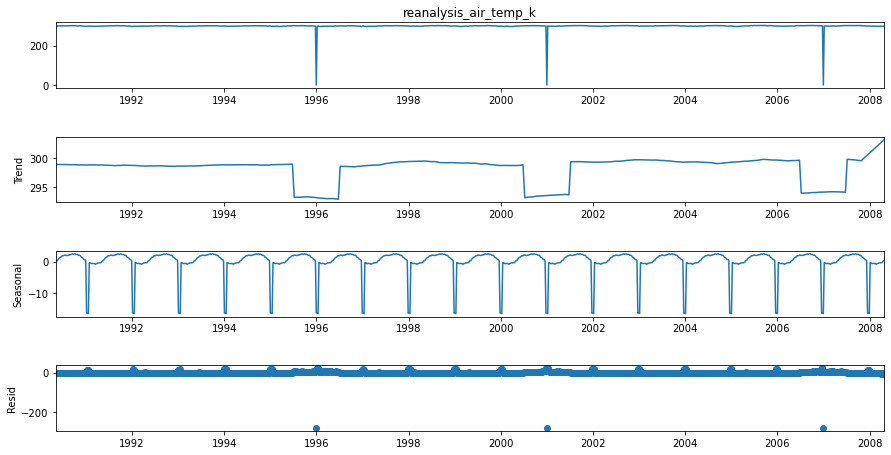

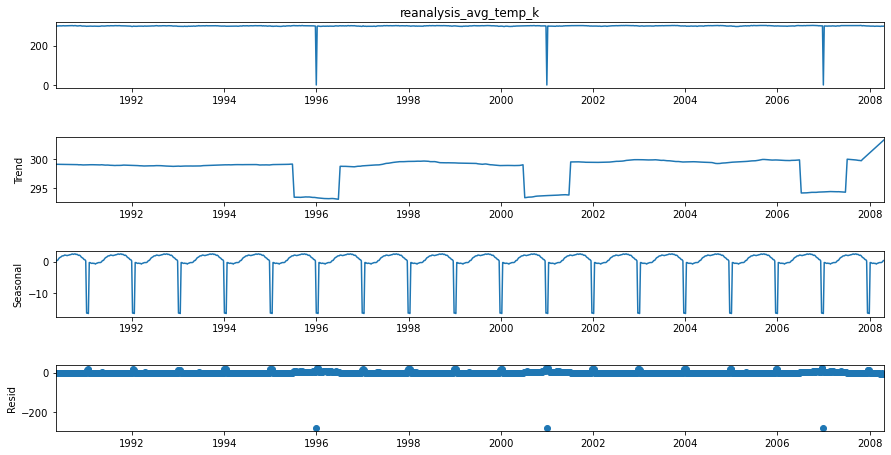

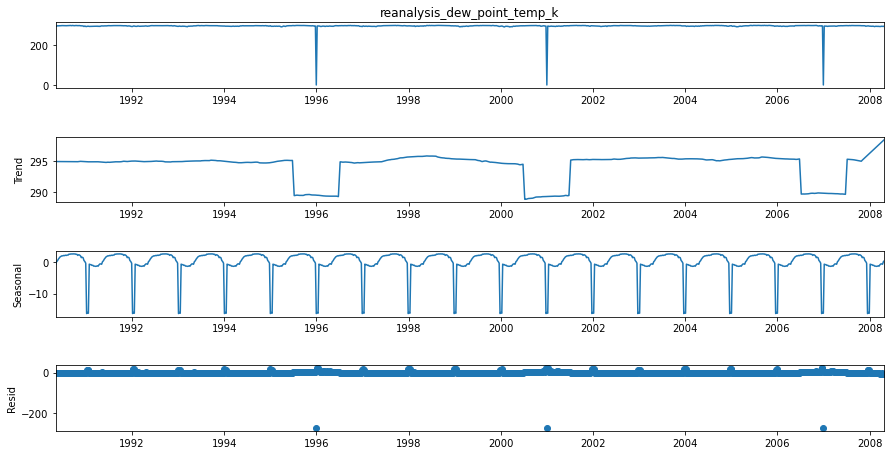

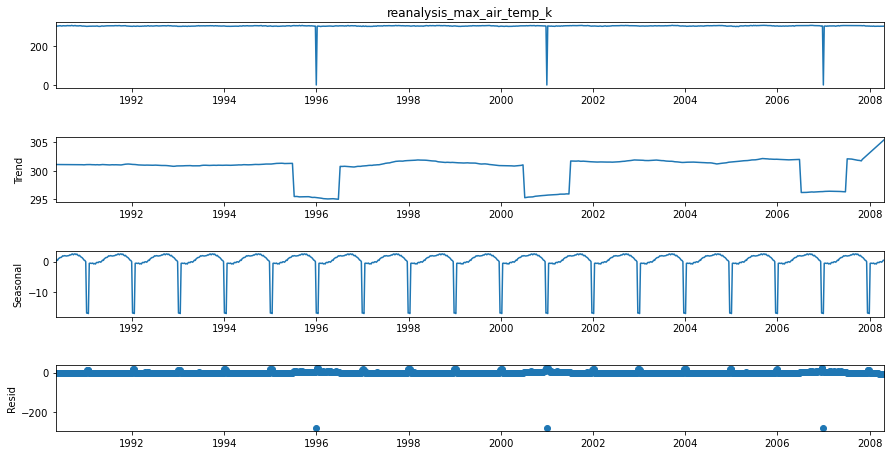

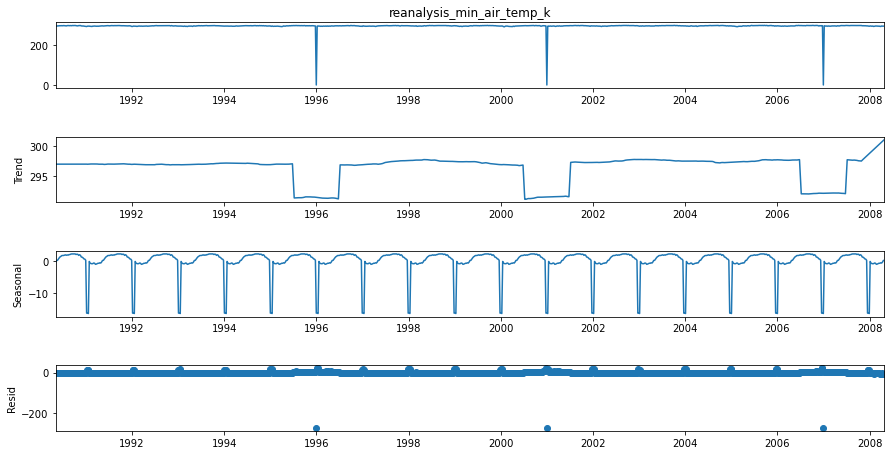

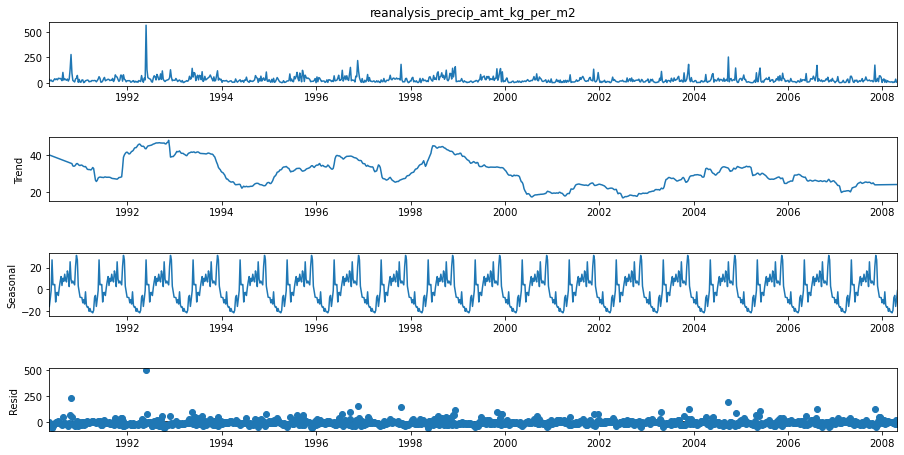

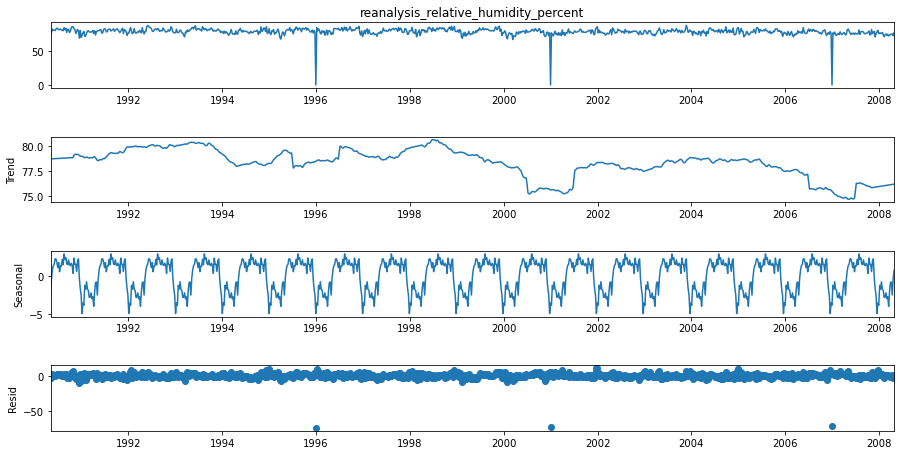

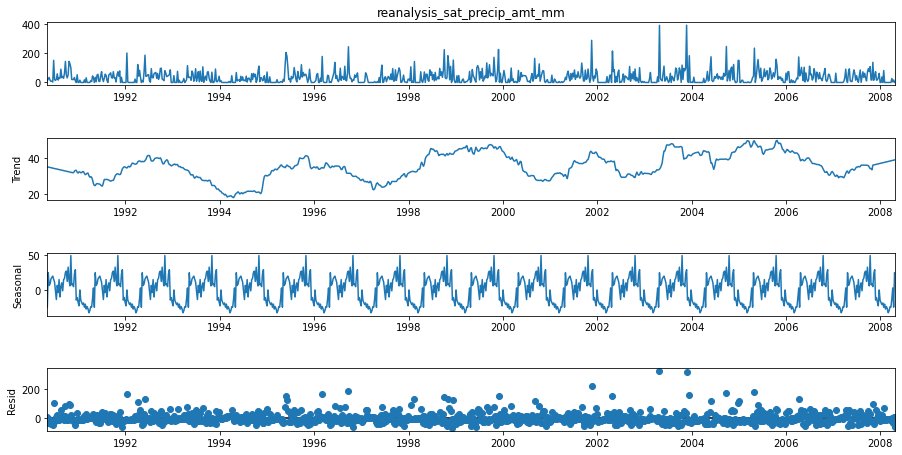

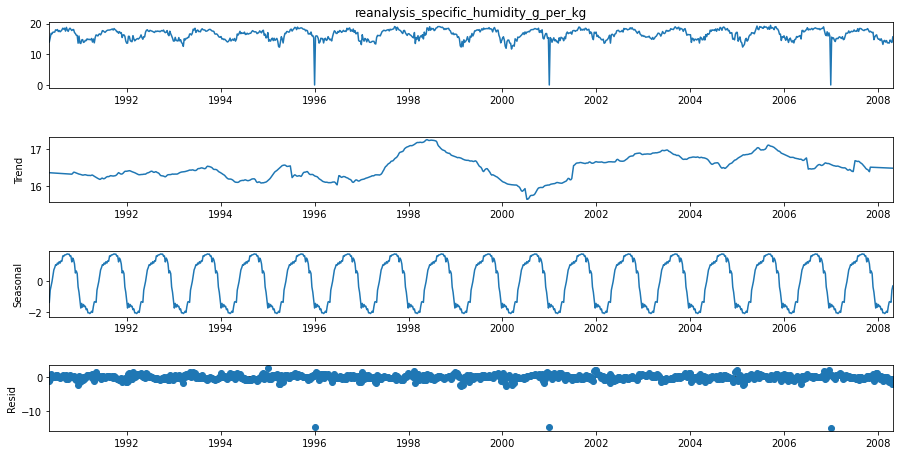

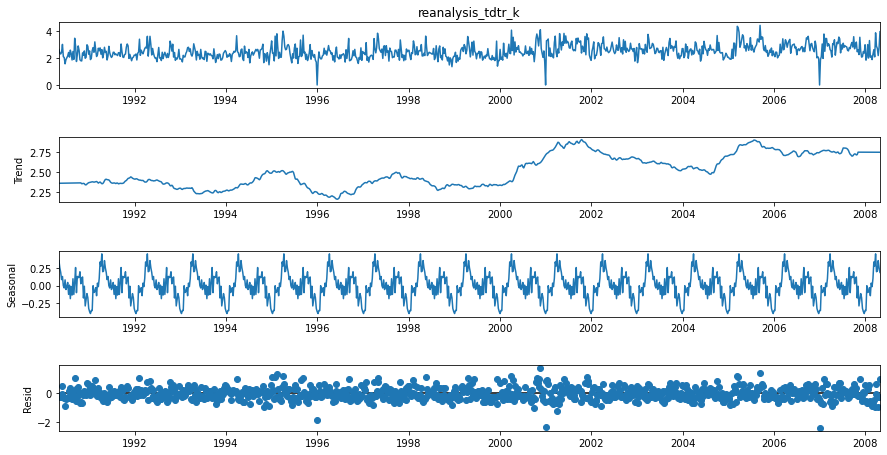

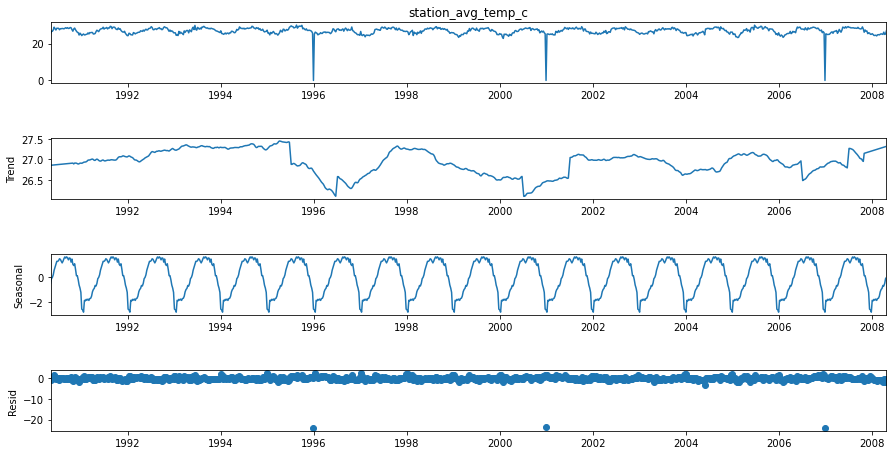

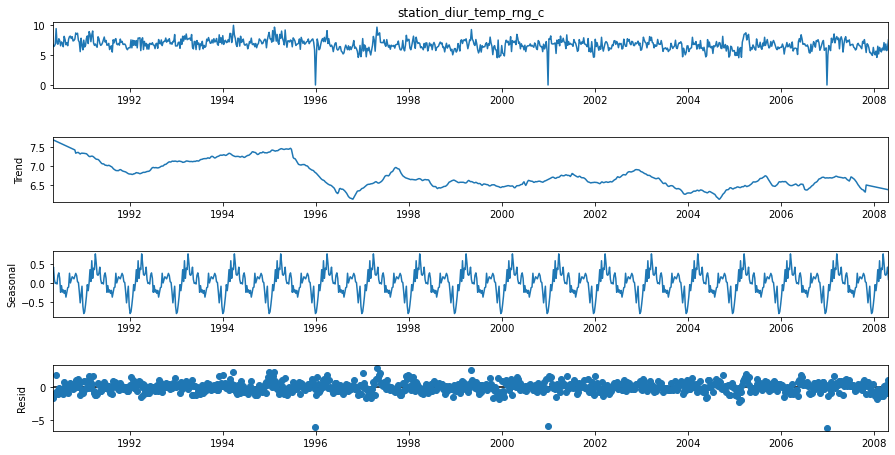

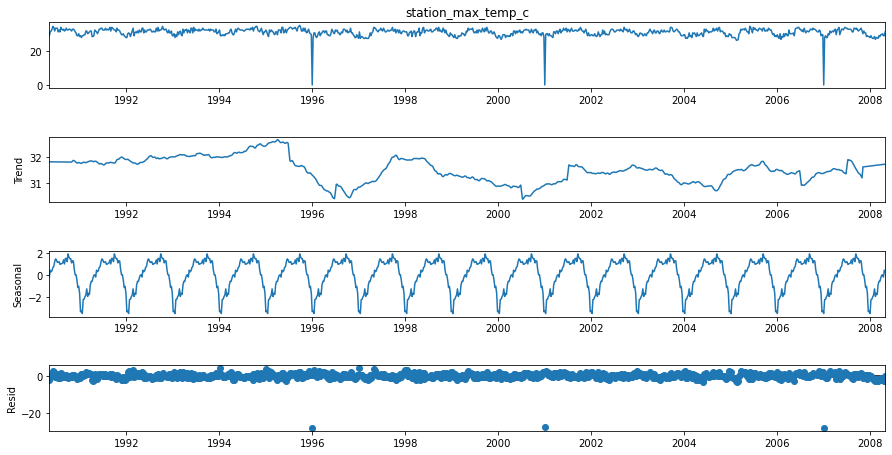

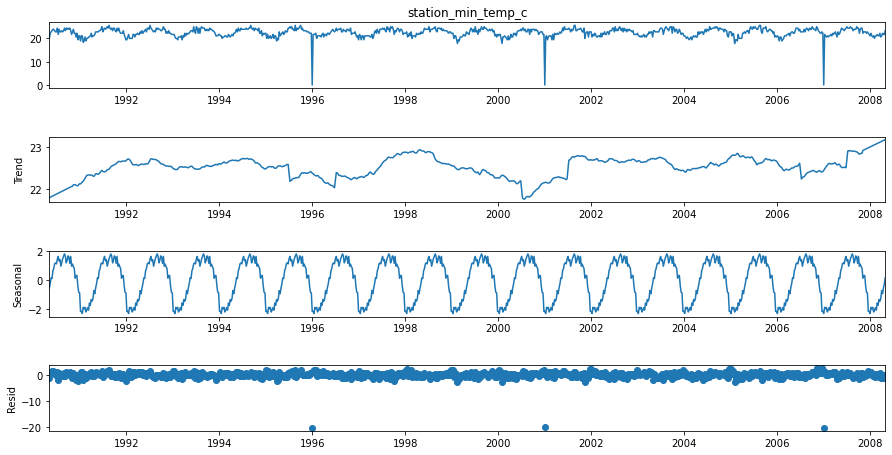

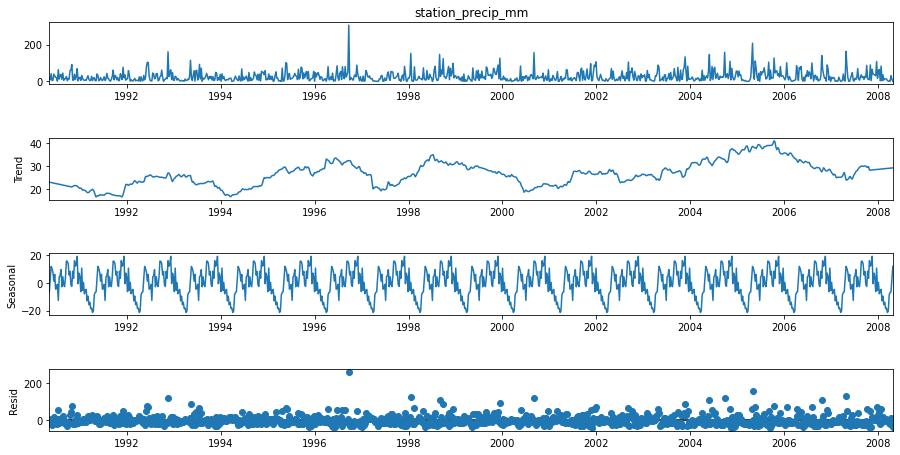

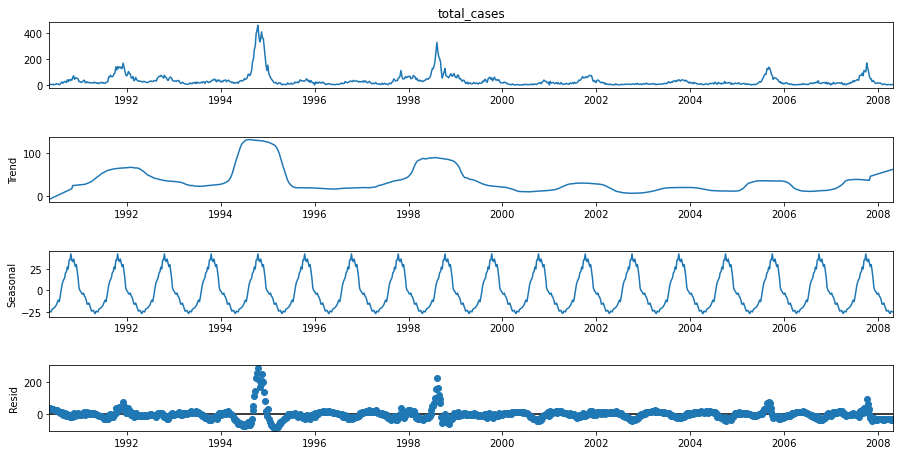

In [38]:
for name, column in sj_train_features.iteritems():
    if name!='week_start_date':
        y=sj_train_features[name]["1990-04-30":"2008-04-22"].resample('W').sum()
        seasonal_decompose(y)

Thus we can see that majority of features including label follow some seasonality with period of approx 69-70 data points. Trend is non-linear in nature

Thus we can leverage this information related to seasonality and trend to do the forecasting 

Therefore, using forecasting model which uses trend, and seasonality information to do prediction make sense

# Model Training 

Using Facebook Prophet model for prediction of time series 
Prophet can be considered a nonlinear regression model of the form

$y_{t}$ = g(t) + s(t) + h(t) + $E_{t}$

where $y_{t}$ is the time series value at time "t" and g(t) captures the piecewise-linear trend, s(t) captures the various seasonal patterns, h(t) captures the holiday effects, and $E_{t}$ is a white noise error term.

https://otexts.com/fpp3/prophet.html

### NOTE:
We have seen from the above plots that total_cases depends on its past values thus it will be good idea to use lagged total_cases as a feature to do the prediction task

Splitting data for training and validation

In [108]:
def load_data(data_path, labels_path=None):
    """
        Description: Load input data in DataFrame
        Args:
            data_path: path to input data
        Outputs:
            input dataFrame
    """
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want
    features = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 
                 'station_min_temp_c',
                'week_start_date']
    df = df[features]
    
    # fill missing values
    df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    sj = df.loc['sj']
    iq = df.loc['iq']
    
    return sj, iq

In [126]:
def preprocessing(df, mode='train'):
    """
        Description: split train/validation, do some preprocessing to change the input data to use prophet model
        Args:
            df: input dataframe
        Outputs:
            train_x: Training dataframe
            test_x: Testing dataframe
    """
    # split train and test
    if mode=='train':
        l = int(0.8 * len(df))        
        df_train = df.head(l)
        df_test = df.tail(df.shape[0] - l)

        # using previous prediction/true value is a feature
        df_train['lagged_total_cases']=0
        df_train.loc[1:, 'lagged_total_cases'] = df_train.lagged_total_cases.values[:-1]

        train_x=(df_train[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
               'station_avg_temp_c', 'station_min_temp_c', 'lagged_total_cases', 'total_cases', 'week_start_date']])
        train_x['Date'] = pd.to_datetime(df_train['week_start_date'])
        train_x.rename(columns={'total_cases':'y', 'week_start_date':'ds'}, inplace=True)
        train_x.rename(columns={'total_cases':'y', 'week_start_date':'ds'}, inplace=True)
        train_x=train_x.reset_index(drop=True)

        test_x=(df_test[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
               'station_avg_temp_c', 'station_min_temp_c', 'total_cases', 'week_start_date']])
        test_x['Date'] = pd.to_datetime(df_test['week_start_date'])
        test_x.rename(columns={'total_cases':'y', 'week_start_date':'ds'}, inplace=True)
        test_x.rename(columns={'total_cases':'y', 'week_start_date':'ds'}, inplace=True)
        test_x=test_x.reset_index(drop=True)

        return train_x, test_x
    else:

        # using previous prediction/true value is a feature
        df['lagged_total_cases']=0
        df.loc[1:, 'lagged_total_cases'] = df.lagged_total_cases.values[:-1]

        x=(df[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
               'station_avg_temp_c', 'station_min_temp_c', 'lagged_total_cases', 'week_start_date']])
        x['Date'] = pd.to_datetime(df['week_start_date'])
        x.rename(columns={'week_start_date':'ds'}, inplace=True)
        x=x.reset_index(drop=True)

        return x

In [129]:
def train(df, name):
    """
        Description: Train prophet model+hyperparamter tuning
        Args: 
            df: input dataframe
        
    """
    train_x, test_x = preprocessing(df)
    
    best_mse = 1e7
    # i is hyperparameter
    for it in [0.1]:
        model=Prophet(interval_width=it)
        model.add_regressor('reanalysis_specific_humidity_g_per_kg', standardize=False)
        model.add_regressor('reanalysis_dew_point_temp_k', standardize=False)
        model.add_regressor('station_avg_temp_c', standardize=False)
        model.add_regressor('station_min_temp_c', standardize=False)
        model.add_regressor('lagged_total_cases', standardize=False)
    
        #training
        model.fit(train_x)
        
        # recursive testing
        # using lagged prediction value as a feature
        test_x["lagged_total_cases"] = 0 
        forecast_ms = []
        for i in range(test_x.shape[0]):
            recursive_x=test_x.loc[:i, ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
               'station_avg_temp_c', 'station_min_temp_c', 'ds', 'lagged_total_cases']]
            pred = model.predict(recursive_x)
            test_x.loc[i, 'lagged_total_cases'] = pred.loc[i, 'yhat']
        
        mse = np.mean((pred.yhat.values - test_x.y.values)**2)
        if mse < best_mse:
            best_mse = mse
            print("best mse = {} for {} with i as {}".format(mse, name, it))
            print("saving...")
            if not os.path.exists("./checkpoint"):
                os.makedirs("./checkpoint")

            with open('./checkpoint/serialized_model_{}.json'.format(name), 'w') as fout:
                fout.write(model_to_json(model))  # Save model
            print("Done!!")
    return model

In [130]:
model_iq=train(iq_train_features, "iq")
model_sj=train(sj_train_features, "sj")

23:45:51 - cmdstanpy - INFO - Chain [1] start processing
23:45:51 - cmdstanpy - INFO - Chain [1] done processing
23:46:55 - cmdstanpy - INFO - Chain [1] start processing


best mse = 122.9300188015287 for iq with i as 0.1
saving...
Done!!


23:46:55 - cmdstanpy - INFO - Chain [1] done processing


best mse = 1330.032117974705 for sj with i as 0.1
saving...
Done!!


In [136]:
def produce_submission(model_iq, model_sj):
    if not os.path.exists("./data-processed"):
        os.makedirs("./data-processed")
    sj_test, iq_test = load_data('./data-processed/dengue_features_test.csv')
    
    sj_test=preprocessing(sj_test,mode='val')
    iq_test=preprocessing(iq_test,mode='val')
    
#     with open('./checkpoint/serialized_model_sj.json', 'r') as fin:
#         model = model_from_json(fin.read())  # Load model

#     with open('./checkpoint/serialized_model_iq.json', 'r') as fin:
#         iq_best_model = model_from_json(fin.read())  # Load model

    sj_test['lagged_total_cases'] = 0 
    forecast_ms = []
    for i in range(sj_test.shape[0]):
        recursive_x=sj_test.loc[:i, ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
           'station_avg_temp_c', 'station_min_temp_c', 'ds', 'lagged_total_cases']]
        pred = model.predict(recursive_x)
        sj_test.loc[i, 'lagged_total_cases'] = pred.loc[i, 'yhat']
    sj_predictions = pred.yhat

    iq_test['lagged_total_cases'] = 0 
    forecast_ms = []
    for i in range(iq_test.shape[0]):
        recursive_x=iq_test.loc[:i, ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k',
           'station_avg_temp_c', 'station_min_temp_c', 'ds', 'lagged_total_cases']]
        pred = model.predict(recursive_x)
        iq_test.loc[i, 'lagged_total_cases'] = pred.loc[i, 'yhat']
    iq_predictions = pred.yhat

    submission = pd.read_csv("./data-processed/submission_format.csv",
                             index_col=[0, 1, 2])

    submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
    submission.to_csv("./data-processed/benchmark.csv")
    print(submission)
    return 

In [ ]:
produce_submission(model_iq, model_sj)